In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import sys
import copy
import matplotlib
%matplotlib inline
sys.path.append("..")

# Directories for our method
load_directories1 = ['/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/retrain_3element_hardware_resetevery10_graphserch_RESTARTED/restarted-0/restarted-0/06-08-dev-example-awac-script/06-08-dev-example-awac-script_2021_06_08_16_05_13_0000--s-97874/',
                  '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/startedfrom34_graphsearch_retrained_hardware_3elements/restarted-0/restarted-0/06-09-dev-example-awac-script/06-09-dev-example-awac-script_2021_06_09_11_34_38_0000--s-67388/',
                  '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/startedfrom64_graphsearch_retrained_hardware_3elements/restarted-0/restarted-0/06-09-dev-example-awac-script/06-09-dev-example-awac-script_2021_06_09_16_06_42_0000--s-85048/']

load_directories2 = ['/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/randomtaskcommand_pretrainlowlevel_3elems_hardware/restarted-0/restarted-0/06-10-dev-example-awac-script/06-10-dev-example-awac-script_2021_06_10_11_02_06_0000--s-95081/',
                  '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/randomtaskcommand_pretrainlowlevel_3elems_hardware_restarted26/restarted-0/restarted-0/06-10-dev-example-awac-script/06-10-dev-example-awac-script_2021_06_10_15_39_33_0000--s-25922',
#                   '/usr/local/google/home/abhishekunique/sim_franka/simplified_awac/startedfrom64_graphsearch_retrained_hardware_3elements/restarted-0/restarted-0/06-09-dev-example-awac-script/06-09-dev-example-awac-script_2021_06_09_16_06_42_0000--s-85048/'
                   ]

import os
from pathlib import Path
paths1 = []

paths2 = []

for load_directory in load_directories1:
    files = sorted(Path(load_directory).iterdir(), key=os.path.getmtime)
    for f in files: 
        if 'diagnostic' not in f.name or 'overall' in f.name:
            continue
        print(f.name)
        path = pickle.load(open(f, 'rb'))
        paths1.append(path)
        
for load_directory in load_directories2:
    files = sorted(Path(load_directory).iterdir(), key=os.path.getmtime)
    for f in files: 
        if 'diagnostic' not in f.name or 'overall' in f.name:
            continue
        print(f.name)
        path = pickle.load(open(f, 'rb'))
        paths2.append(path)
print(len(paths1))
print(len(paths2))

diagnostics_itr_0.pkl
diagnostics_itr_5.pkl
diagnostics_itr_10.pkl
diagnostics_itr_15.pkl
diagnostics_itr_0.pkl
diagnostics_itr_5.pkl
diagnostics_itr_10.pkl
diagnostics_itr_15.pkl
diagnostics_itr_0.pkl
diagnostics_itr_5.pkl
diagnostics_itr_10.pkl
diagnostics_itr_15.pkl
diagnostics_itr_20.pkl
diagnostics_itr_25.pkl
diagnostics_itr_30.pkl
diagnostics_itr_35.pkl
diagnostics_itr_40.pkl
diagnostics_itr_45.pkl
diagnostics_itr_0.pkl
diagnostics_itr_5.pkl
diagnostics_itr_10.pkl
diagnostics_itr_0.pkl
diagnostics_itr_5.pkl
diagnostics_itr_10.pkl
diagnostics_itr_15.pkl
diagnostics_itr_20.pkl
18
8


In [6]:
all_returns = []
all_completions = []
all_sparse = []
for pitr, p in enumerate(paths1):
    print("PATH NUMBER %d"%pitr)
    cumulative_paths = []
    cumulative_completed = []
    cumulative_sparse = []
    for i in range(len(p)):
        for j in range(len(p)):
            if p[i][j]:
                cumulative_paths += p[i][j]
                for pathitr in p[i][j]:
                    completed_arr = []
                    for k in range(len(pathitr['env_infos'])):
                        completed_arr.append(pathitr['env_infos'][k]['obs/completion'])
                    completed_arr = np.array(completed_arr)
                    cumulative_completed.append(completed_arr.max())
                    cumulative_sparse.append(completed_arr.sum())
    cumulative_return = np.array([currp['rewards'].sum() for currp in cumulative_paths])
    cumulative_completion_metric = np.array(cumulative_completed)
    cumulative_sparse_metric = np.array(cumulative_sparse)
    
    avg_return = np.mean(cumulative_return)
    avg_completion = np.mean(cumulative_completion_metric)
    avg_sparse = np.mean(cumulative_sparse_metric)
    
    all_returns.append(avg_return)
    all_completions.append(avg_completion)
    all_sparse.append(avg_sparse)

PATH NUMBER 0
PATH NUMBER 1
PATH NUMBER 2
PATH NUMBER 3
PATH NUMBER 4
PATH NUMBER 5
PATH NUMBER 6
PATH NUMBER 7
PATH NUMBER 8
PATH NUMBER 9
PATH NUMBER 10
PATH NUMBER 11
PATH NUMBER 12
PATH NUMBER 13
PATH NUMBER 14
PATH NUMBER 15
PATH NUMBER 16
PATH NUMBER 17


In [7]:
all_returns1 = []
all_completions1 = []
all_sparse1 = []
for pitr, p in enumerate(paths2):
    print("PATH NUMBER %d"%pitr)
    cumulative_paths = []
    cumulative_completed = []
    cumulative_sparse = []
    for i in range(len(p)):
        for j in range(len(p)):
            if p[i][j]:
                cumulative_paths += p[i][j]
                for pathitr in p[i][j]:
                    completed_arr = []
                    for k in range(len(pathitr['env_infos'])):
                        completed_arr.append(pathitr['env_infos'][k]['obs/completion'])
                    completed_arr = np.array(completed_arr)
                    cumulative_completed.append(completed_arr.max())
                    cumulative_sparse.append(completed_arr.sum())
    cumulative_return = np.array([currp['rewards'].sum() for currp in cumulative_paths])
    cumulative_completion_metric = np.array(cumulative_completed)
    cumulative_sparse_metric = np.array(cumulative_sparse)
    
    avg_return = np.mean(cumulative_return)
    avg_completion = np.mean(cumulative_completion_metric)
    avg_sparse = np.mean(cumulative_sparse_metric)
    
    all_returns1.append(avg_return)
    all_completions1.append(avg_completion)
    all_sparse1.append(avg_sparse)

PATH NUMBER 0
PATH NUMBER 1
PATH NUMBER 2
PATH NUMBER 3
PATH NUMBER 4
PATH NUMBER 5
PATH NUMBER 6
PATH NUMBER 7


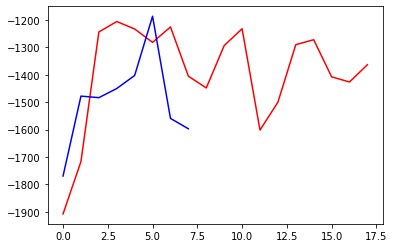

In [8]:
plt.plot(all_returns, color='r')
plt.plot(all_returns1, color='b')

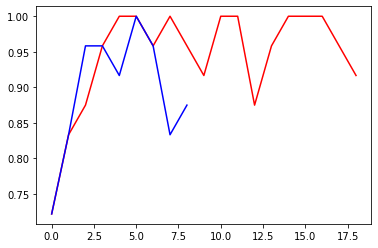

In [11]:
plt.plot(all_completions, color='r')
plt.plot(all_completions1, color='b')

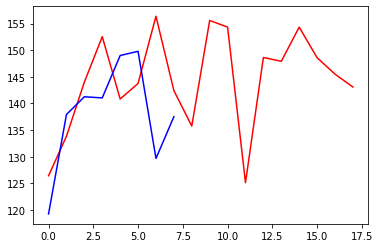

In [10]:
plt.plot(all_sparse, color='r')
plt.plot(all_sparse1, color='b')

In [ ]:
list_awac = och_2_awac(dat)
print(list_awac[0]['observations'].shape)
curr_x = 0
fig, ax = plt.subplots(3, 5, figsize=(20, 20))
for p in list_awac:
    for i in range(3):  
        for j in range(5):
            if i*5 + j == 13:
                break
            if i*5 +j == 1: 
                ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])
            else:
                ax[i][j].plot(range(curr_x, curr_x + len(p['observations'])), p['observations'][:, i*5 + j])

plt.show()